## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:** Seth Ng Jun Jie

**Student ID:** 1067992

### 1. CNN Implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model
from numpy import sqrt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets
import scipy
import random
from sklearn.metrics import classification_report

data_dir = 'yoga32/'
train_batch_size = 32
rand_seed = 70880845 #secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/train',
    validation_split = 0.2,
    subset = "training",
    seed = rand_seed,
    image_size = (32, 32),
    batch_size = train_batch_size)

# Get validation images from 'train' directory
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/train',
    validation_split = 0.2,
    subset = "validation",
    seed = rand_seed,
    image_size = (32, 32),
    batch_size = train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


In [22]:
rand_seed

70880845

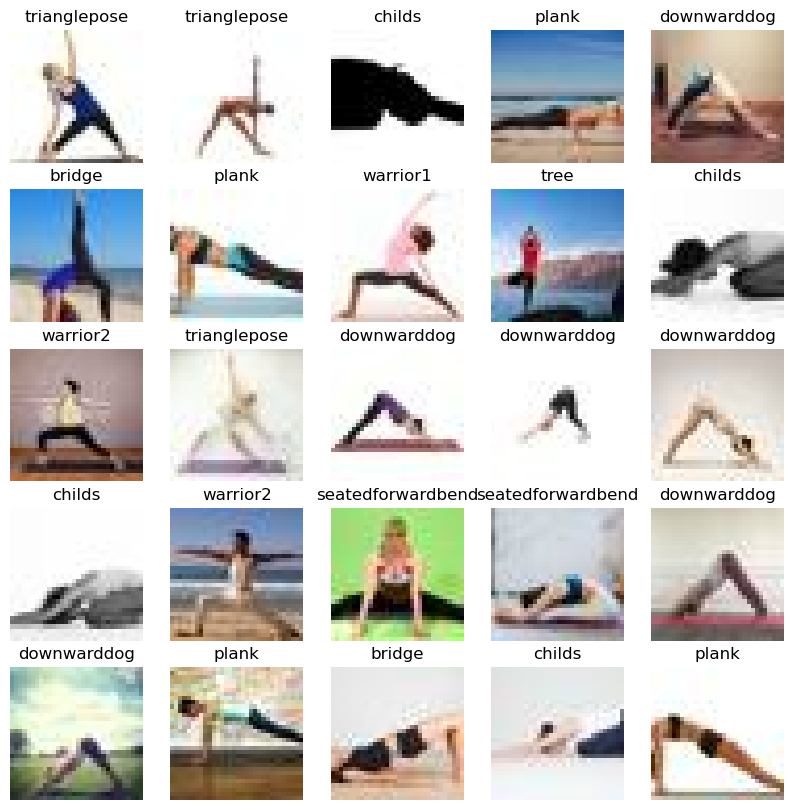

In [2]:
# some examples of the images in the original training dataset
plt.figure(figsize = (10, 10))
for images, labels in train_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Question 1.1.
Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

In [3]:
cnn = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1)),
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1)),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1)),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1)),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        
        layers.Flatten(),
        layers.Dense(10, activation = 'softmax')
    ], 
)

In [4]:
# using the Adam optimiser and 'SparseCategoricalCrossentropy' loss function for training
cnn.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
            metrics = ['accuracy'])

history_cnn = cnn.fit(train_data, validation_data = val_data, epochs = 250, batch_size = 32)

Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/13 [======================>.......] - ETA: 0s - loss: 11.8669 - accuracy: 0.1344WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F84EB92798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

Epoch 45/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0156 - accuracy: 0.9976 - val_loss: 3.2533 - val_accuracy: 0.4808
Epoch 46/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0147 - accuracy: 0.9976 - val_loss: 3.2300 - val_accuracy: 0.4615
Epoch 47/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 3.3197 - val_accuracy: 0.4519
Epoch 48/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0177 - accuracy: 0.9976 - val_loss: 3.3453 - val_accuracy: 0.4712
Epoch 49/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 3.3200 - val_accuracy: 0.4423
Epoch 50/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0108 - accuracy: 0.9952 - val_loss: 3.2803 - val_accuracy: 0.4423
Epoch 51/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 3.3665 - val_accuracy: 0.4712

Epoch 159/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0045 - accuracy: 0.9952 - val_loss: 3.4522 - val_accuracy: 0.4904
Epoch 160/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 3.4503 - val_accuracy: 0.4712
Epoch 161/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 3.5589 - val_accuracy: 0.4712
Epoch 162/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0104 - accuracy: 0.9976 - val_loss: 3.6124 - val_accuracy: 0.4808
Epoch 163/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.6586 - val_accuracy: 0.4712
Epoch 164/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0117 - accuracy: 0.9976 - val_loss: 3.5047 - val_accuracy: 0.4615
Epoch 165/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0041 - accuracy: 0.9976 - val_loss: 3.4392 - val_accuracy:

Epoch 216/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 3.9491 - val_accuracy: 0.4615
Epoch 217/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 4.0665 - val_accuracy: 0.4904
Epoch 218/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 3.8850 - val_accuracy: 0.4519
Epoch 219/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0099 - accuracy: 0.9952 - val_loss: 3.9208 - val_accuracy: 0.4519
Epoch 220/250
13/13 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 0.9976 - val_loss: 4.0405 - val_accuracy: 0.4615
Epoch 221/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 4.1373 - val_accuracy: 0.4712
Epoch 222/250
13/13 [==============================] - 0s 16ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 3.9080 - val_accuracy:

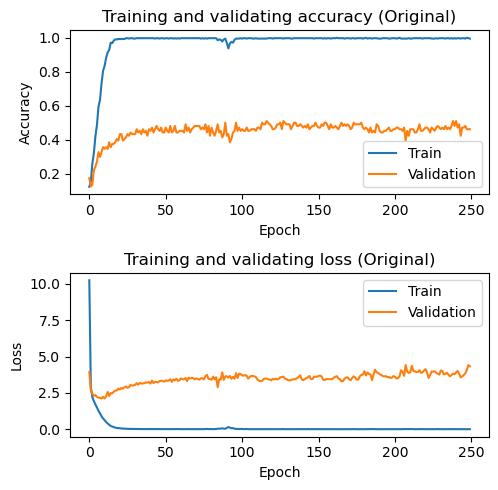

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,5))
ax1.plot(history_cnn.history['accuracy'], label='Train')
ax1.plot(history_cnn.history['val_accuracy'], label='Validation')
ax1.set(ylabel = 'Accuracy', xlabel = 'Epoch')
ax1.set_title('Training and validating accuracy (Original)')
ax1.legend()

ax2.plot(history_cnn.history['loss'], label='Train')
ax2.plot(history_cnn.history['val_loss'], label='Validation')
ax2.set(ylabel = 'Loss', xlabel = 'Epoch')
ax2.set_title('Training and validating loss (Original)')
ax2.legend()

fig.tight_layout()
plt.show()

### Question 1.2.
Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

### L1/2 Norm, Dropout, and Early Stopping

In [6]:
cnn = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l1(l = 0.01)),
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.001)),
        tf.keras.layers.Dropout(0.3),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.001)),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.01)),
        tf.keras.layers.Dropout(0.3),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        
        layers.Flatten(),
        #tf.keras.layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ], 
)

In [13]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 24)        3480      
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 24)        5208      
                                                      

In [7]:
# using the Adam optimiser and 'SparseCategoricalCrossentropy' loss function for training
cnn.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
            metrics = ['accuracy'])

# early stop if there is no loss decrease of at least 0.01 within the next 50 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 50)

history_cnn = cnn.fit(train_data, validation_data = val_data, epochs = 250, batch_size = 32, callbacks = [callback])

Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12/13 [==========================>...] - ETA: 0s - loss: 19.1972 - accuracy: 0.0885WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F84F0D3F78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

Epoch 45/250
13/13 [==============================] - 0s 18ms/step - loss: 0.8063 - accuracy: 0.8846 - val_loss: 2.7668 - val_accuracy: 0.4519
Epoch 46/250
13/13 [==============================] - 0s 19ms/step - loss: 0.7286 - accuracy: 0.9062 - val_loss: 2.6757 - val_accuracy: 0.4519
Epoch 47/250
13/13 [==============================] - 0s 18ms/step - loss: 0.8260 - accuracy: 0.8798 - val_loss: 2.7548 - val_accuracy: 0.4712
Epoch 48/250
13/13 [==============================] - 0s 19ms/step - loss: 0.7285 - accuracy: 0.9087 - val_loss: 2.6872 - val_accuracy: 0.4519
Epoch 49/250
13/13 [==============================] - 0s 18ms/step - loss: 0.7251 - accuracy: 0.9038 - val_loss: 2.7239 - val_accuracy: 0.4615
Epoch 50/250
13/13 [==============================] - 0s 18ms/step - loss: 0.6609 - accuracy: 0.9327 - val_loss: 2.7230 - val_accuracy: 0.4712
Epoch 51/250
13/13 [==============================] - 0s 18ms/step - loss: 0.7749 - accuracy: 0.9062 - val_loss: 2.7572 - val_accuracy: 0.5000

Epoch 159/250
13/13 [==============================] - 0s 21ms/step - loss: 0.5007 - accuracy: 0.9471 - val_loss: 3.3182 - val_accuracy: 0.4712
Epoch 160/250
13/13 [==============================] - 0s 20ms/step - loss: 0.4484 - accuracy: 0.9519 - val_loss: 3.1041 - val_accuracy: 0.4615
Epoch 161/250
13/13 [==============================] - 0s 24ms/step - loss: 0.4677 - accuracy: 0.9543 - val_loss: 3.1045 - val_accuracy: 0.5192
Epoch 162/250
13/13 [==============================] - 0s 20ms/step - loss: 0.4358 - accuracy: 0.9688 - val_loss: 2.9278 - val_accuracy: 0.5385
Epoch 163/250
13/13 [==============================] - 0s 19ms/step - loss: 0.3855 - accuracy: 0.9856 - val_loss: 3.1334 - val_accuracy: 0.5385
Epoch 164/250
13/13 [==============================] - 0s 19ms/step - loss: 0.3846 - accuracy: 0.9832 - val_loss: 3.0694 - val_accuracy: 0.5000
Epoch 165/250
13/13 [==============================] - 0s 19ms/step - loss: 0.3806 - accuracy: 0.9832 - val_loss: 3.1535 - val_accuracy:

Epoch 216/250
13/13 [==============================] - 0s 21ms/step - loss: 0.3156 - accuracy: 0.9952 - val_loss: 2.8223 - val_accuracy: 0.5577
Epoch 217/250
13/13 [==============================] - 0s 20ms/step - loss: 0.3208 - accuracy: 0.9856 - val_loss: 2.6795 - val_accuracy: 0.5385
Epoch 218/250
13/13 [==============================] - 0s 19ms/step - loss: 0.3196 - accuracy: 0.9856 - val_loss: 3.1366 - val_accuracy: 0.4904
Epoch 219/250
13/13 [==============================] - 0s 18ms/step - loss: 0.3366 - accuracy: 0.9832 - val_loss: 3.1800 - val_accuracy: 0.5481
Epoch 220/250
13/13 [==============================] - 0s 21ms/step - loss: 0.3018 - accuracy: 0.9952 - val_loss: 3.1891 - val_accuracy: 0.5192
Epoch 221/250
13/13 [==============================] - 0s 23ms/step - loss: 0.3286 - accuracy: 0.9856 - val_loss: 3.1153 - val_accuracy: 0.5000
Epoch 222/250
13/13 [==============================] - 0s 20ms/step - loss: 0.3322 - accuracy: 0.9832 - val_loss: 2.8072 - val_accuracy:

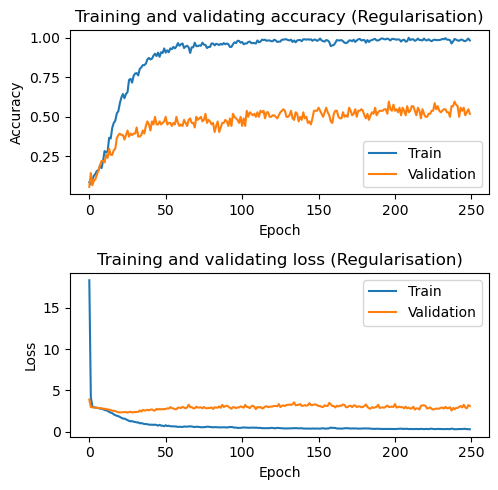

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,5))
ax1.plot(history_cnn.history['accuracy'], label='Train')
ax1.plot(history_cnn.history['val_accuracy'], label='Validation')
ax1.set(ylabel = 'Accuracy', xlabel = 'Epoch')
ax1.set_title('Training and validating accuracy (Regularisation)')
ax1.legend()

ax2.plot(history_cnn.history['loss'], label='Train')
ax2.plot(history_cnn.history['val_loss'], label='Validation')
ax2.set(ylabel = 'Loss', xlabel = 'Epoch')
ax2.set_title('Training and validating loss (Regularisation)')
ax2.legend()

fig.tight_layout()
plt.show()

### Adding On Image Augmentation

In [9]:
# specify the data augmentations we want to include
datagen = ImageDataGenerator(
    #rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    #vertical_flip = True,
    brightness_range = [0.2,1.2])

Found 520 images belonging to 10 classes.


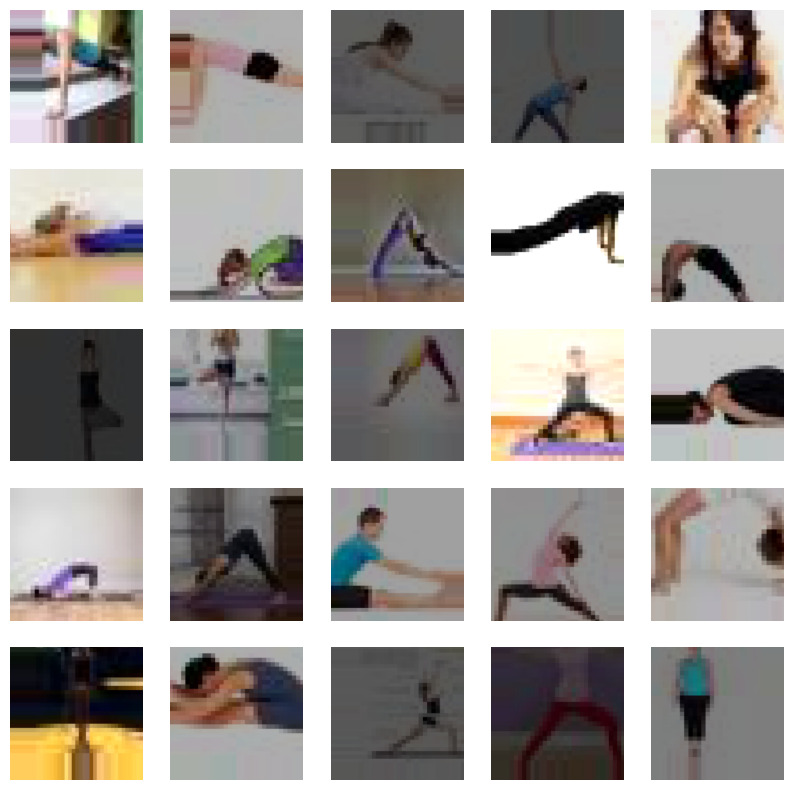

In [10]:
# just used as an example to showcase the data augmentations, example_datagen is not used later
example_datagen = datagen.flow_from_directory (
                      directory = data_dir + r'/train/',
                      color_mode = "rgb",
                      batch_size = 1,
                      class_mode = "binary",
                      seed = rand_seed

fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (10,10))

for i in range(5):
    for j in range(5):

        image = next(example_datagen)[0].astype('uint8')
        # reshape from (1, 200, 200, 3) to (200, 200, 3)
        image = np.squeeze(image)
        ax[i][j].imshow(image)
        ax[i][j].axis('off')

In [11]:
# used to compile x_train, y_train, x_val, and y_val
train_images = []
train_labels = []
val_images = []
val_labels = []

for images, labels in train_data:
    train_images.append(images)
    train_labels.append(labels)
    
for images, labels in val_data:
    val_images.append(images)
    val_labels.append(labels)
    
x_train = train_images[0]
for images in train_images[1:]:
    x_train = tf.concat(values = [x_train, images], axis = 0)
    
y_train = train_labels[0]
for labels in train_labels[1:]:
    y_train = tf.concat(values = [y_train, labels], axis = 0)
    
x_val = val_images[0]
for images in val_images[1:]:
    x_val = tf.concat(values = [x_val, images], axis = 0)
    
y_val = val_labels[0]
for labels in val_labels[1:]:
    y_val = tf.concat(values = [y_val, labels], axis = 0)
    
# normalise values so all pixel values range between 0 and 1
#x_train = x_train/255
#x_val = x_val/255

In [12]:
cnn = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l1(l = 0.01)),
        layers.Conv2D(16, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.001)),
        tf.keras.layers.Dropout(0.3),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.001)),
        layers.Conv2D(24, (3, 3), activation = 'relu', padding = 'valid', strides = (1, 1), kernel_regularizer = tf.keras.regularizers.l2(l = 0.01)),
        tf.keras.layers.Dropout(0.3),
        layers.MaxPooling2D((2, 2), strides = (2, 2), padding = 'valid'),
        
        layers.Flatten(),
        #tf.keras.layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ], 
)

In [14]:
# using the Adam optimiser and 'SparseCategoricalCrossentropy' loss function for training
cnn.compile(optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
            metrics = ['accuracy'])

history_cnn = cnn.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), 
                    epochs = 500,
                    callbacks = [callback],
                    steps_per_epoch = x_train.shape[0]//32,
                    validation_data = (x_val, y_val),
                    validation_steps = x_val.shape[0]//32)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\Seth\anaconda3\envs\CV\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


12/13 [==========================>...] - ETA: 0s - loss: 19.2516 - accuracy: 0.0885WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F850B1FF78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - 1s 28ms/step - loss: 18.2988 - accuracy: 0.0841 - val_loss: 5.0347 - val_accuracy: 0.0865
Epoch 2/500

13/13 [==============================] - 0s 20ms/step - loss: 2.0863 - accuracy: 0.3317 - val_loss: 2.1101 - val_accuracy: 0.4038
Epoch 109/500
13/13 [==============================] - 0s 20ms/step - loss: 2.0465 - accuracy: 0.3654 - val_loss: 2.1219 - val_accuracy: 0.3077
Epoch 110/500
13/13 [==============================] - 0s 20ms/step - loss: 2.0074 - accuracy: 0.4014 - val_loss: 2.0770 - val_accuracy: 0.3365
Epoch 111/500
13/13 [==============================] - 0s 19ms/step - loss: 1.9522 - accuracy: 0.4087 - val_loss: 2.0496 - val_accuracy: 0.3462
Epoch 112/500
13/13 [==============================] - 0s 19ms/step - loss: 2.0408 - accuracy: 0.4135 - val_loss: 2.0992 - val_accuracy: 0.3462
Epoch 113/500
13/13 [==============================] - 0s 21ms/step - loss: 2.0320 - accuracy: 0.4038 - val_loss: 2.1332 - val_accuracy: 0.3365
Epoch 114/500
13/13 [==============================] - 0s 22ms/step - loss: 2.0909 - accuracy: 0.3702 - val_loss: 2.0595 - val_accuracy: 0.3558
Epoch 

Epoch 165/500
13/13 [==============================] - 0s 19ms/step - loss: 1.5086 - accuracy: 0.5433 - val_loss: 1.5852 - val_accuracy: 0.5288
Epoch 166/500
13/13 [==============================] - 0s 19ms/step - loss: 1.4703 - accuracy: 0.5673 - val_loss: 1.5942 - val_accuracy: 0.5096
Epoch 167/500
13/13 [==============================] - 0s 20ms/step - loss: 1.5519 - accuracy: 0.5048 - val_loss: 1.6545 - val_accuracy: 0.5192
Epoch 168/500
13/13 [==============================] - 0s 20ms/step - loss: 1.4641 - accuracy: 0.5841 - val_loss: 1.5930 - val_accuracy: 0.5192
Epoch 169/500
13/13 [==============================] - 0s 20ms/step - loss: 1.5667 - accuracy: 0.5288 - val_loss: 1.8337 - val_accuracy: 0.6058
Epoch 170/500
13/13 [==============================] - 0s 20ms/step - loss: 1.6325 - accuracy: 0.5216 - val_loss: 1.6448 - val_accuracy: 0.5096
Epoch 171/500
13/13 [==============================] - 0s 19ms/step - loss: 1.4905 - accuracy: 0.5577 - val_loss: 1.6306 - val_accuracy:

Epoch 222/500
13/13 [==============================] - 0s 20ms/step - loss: 1.2327 - accuracy: 0.6538 - val_loss: 1.6325 - val_accuracy: 0.5192
Epoch 223/500
13/13 [==============================] - 0s 19ms/step - loss: 1.2104 - accuracy: 0.6514 - val_loss: 1.4374 - val_accuracy: 0.6250
Epoch 224/500
13/13 [==============================] - 0s 20ms/step - loss: 1.3084 - accuracy: 0.6154 - val_loss: 1.4669 - val_accuracy: 0.6250
Epoch 225/500
13/13 [==============================] - 0s 19ms/step - loss: 1.3809 - accuracy: 0.6178 - val_loss: 1.4827 - val_accuracy: 0.5962
Epoch 226/500
13/13 [==============================] - 0s 19ms/step - loss: 1.3408 - accuracy: 0.6226 - val_loss: 1.4810 - val_accuracy: 0.5385
Epoch 227/500
13/13 [==============================] - 0s 20ms/step - loss: 1.4480 - accuracy: 0.5962 - val_loss: 1.7602 - val_accuracy: 0.4712
Epoch 228/500
13/13 [==============================] - 0s 20ms/step - loss: 1.3461 - accuracy: 0.6082 - val_loss: 1.4589 - val_accuracy:

Epoch 279/500
13/13 [==============================] - 0s 20ms/step - loss: 1.1194 - accuracy: 0.6995 - val_loss: 1.5421 - val_accuracy: 0.5769
Epoch 280/500
13/13 [==============================] - 0s 20ms/step - loss: 1.0838 - accuracy: 0.6947 - val_loss: 1.5260 - val_accuracy: 0.5962
Epoch 281/500
13/13 [==============================] - 0s 20ms/step - loss: 1.1027 - accuracy: 0.6875 - val_loss: 1.3299 - val_accuracy: 0.5962
Epoch 282/500
13/13 [==============================] - 0s 20ms/step - loss: 1.1677 - accuracy: 0.6899 - val_loss: 1.4444 - val_accuracy: 0.6154
Epoch 283/500
13/13 [==============================] - 0s 19ms/step - loss: 1.2187 - accuracy: 0.6659 - val_loss: 1.6858 - val_accuracy: 0.5481
Epoch 284/500
13/13 [==============================] - 0s 19ms/step - loss: 1.2401 - accuracy: 0.6250 - val_loss: 1.3054 - val_accuracy: 0.6250
Epoch 285/500
13/13 [==============================] - 0s 20ms/step - loss: 1.1446 - accuracy: 0.7067 - val_loss: 1.2504 - val_accuracy:

Epoch 336/500
13/13 [==============================] - 0s 20ms/step - loss: 1.0589 - accuracy: 0.7188 - val_loss: 1.3847 - val_accuracy: 0.6538
Epoch 337/500
13/13 [==============================] - 0s 19ms/step - loss: 1.0976 - accuracy: 0.6995 - val_loss: 1.4267 - val_accuracy: 0.6538
Epoch 338/500
13/13 [==============================] - 0s 20ms/step - loss: 1.0682 - accuracy: 0.7067 - val_loss: 1.2962 - val_accuracy: 0.6827
Epoch 339/500
13/13 [==============================] - 0s 19ms/step - loss: 1.0621 - accuracy: 0.6995 - val_loss: 1.5689 - val_accuracy: 0.5865
Epoch 340/500
13/13 [==============================] - 0s 19ms/step - loss: 1.0011 - accuracy: 0.7428 - val_loss: 1.3174 - val_accuracy: 0.7019
Epoch 341/500
13/13 [==============================] - 0s 20ms/step - loss: 1.0275 - accuracy: 0.7091 - val_loss: 1.3640 - val_accuracy: 0.6731
Epoch 342/500
13/13 [==============================] - 0s 19ms/step - loss: 1.0403 - accuracy: 0.6875 - val_loss: 1.3402 - val_accuracy:

Epoch 393/500
13/13 [==============================] - 0s 19ms/step - loss: 0.8945 - accuracy: 0.7644 - val_loss: 1.1558 - val_accuracy: 0.6827
Epoch 394/500
13/13 [==============================] - 0s 19ms/step - loss: 0.9001 - accuracy: 0.7548 - val_loss: 1.4524 - val_accuracy: 0.6250
Epoch 395/500
13/13 [==============================] - 0s 20ms/step - loss: 0.8934 - accuracy: 0.7548 - val_loss: 1.5226 - val_accuracy: 0.6827
Epoch 396/500
13/13 [==============================] - 0s 20ms/step - loss: 0.8157 - accuracy: 0.7716 - val_loss: 1.3995 - val_accuracy: 0.6731
Epoch 397/500
13/13 [==============================] - 0s 19ms/step - loss: 0.8623 - accuracy: 0.7764 - val_loss: 1.3616 - val_accuracy: 0.6538
Epoch 398/500
13/13 [==============================] - 0s 20ms/step - loss: 0.9378 - accuracy: 0.7572 - val_loss: 1.3987 - val_accuracy: 0.6442
Epoch 399/500
13/13 [==============================] - 0s 20ms/step - loss: 0.8679 - accuracy: 0.7909 - val_loss: 1.5019 - val_accuracy:

Epoch 450/500
13/13 [==============================] - 0s 21ms/step - loss: 0.8597 - accuracy: 0.8029 - val_loss: 1.3041 - val_accuracy: 0.6827
Epoch 451/500
13/13 [==============================] - 0s 19ms/step - loss: 0.9560 - accuracy: 0.7668 - val_loss: 1.3114 - val_accuracy: 0.6346
Epoch 452/500
13/13 [==============================] - 0s 20ms/step - loss: 0.9209 - accuracy: 0.7740 - val_loss: 1.3471 - val_accuracy: 0.6731
Epoch 453/500
13/13 [==============================] - 0s 19ms/step - loss: 0.9094 - accuracy: 0.7716 - val_loss: 1.2762 - val_accuracy: 0.6635
Epoch 454/500
13/13 [==============================] - 0s 20ms/step - loss: 0.8428 - accuracy: 0.8077 - val_loss: 1.2807 - val_accuracy: 0.6442
Epoch 455/500
13/13 [==============================] - 0s 20ms/step - loss: 0.9687 - accuracy: 0.7476 - val_loss: 1.5664 - val_accuracy: 0.6058
Epoch 456/500
13/13 [==============================] - 0s 19ms/step - loss: 0.8871 - accuracy: 0.7909 - val_loss: 1.3303 - val_accuracy:

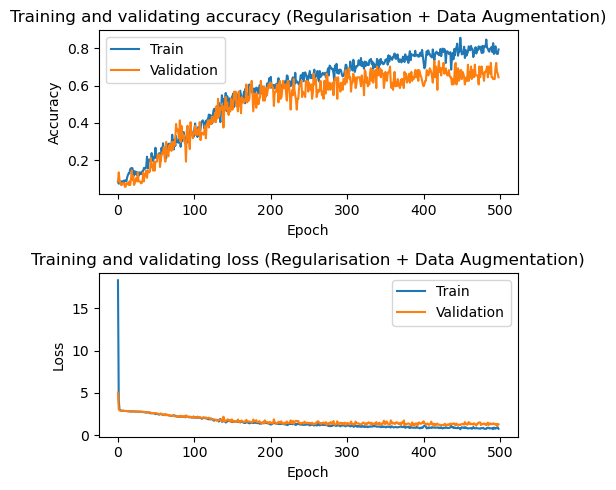

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5,5))
ax1.plot(history_cnn.history['accuracy'], label='Train')
ax1.plot(history_cnn.history['val_accuracy'], label='Validation')
ax1.set(ylabel = 'Accuracy', xlabel = 'Epoch')
ax1.set_title('Training and validating accuracy (Regularisation + Data Augmentation)')
ax1.legend()

ax2.plot(history_cnn.history['loss'], label='Train')
ax2.plot(history_cnn.history['val_loss'], label='Validation')
ax2.set(ylabel = 'Loss', xlabel = 'Epoch')
ax2.set_title('Training and validating loss (Regularisation + Data Augmentation)')
ax2.legend()

fig.tight_layout()
plt.show()

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [16]:
# Get test images from 'test' directory
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir + '/test',
    seed = rand_seed,
    image_size = (32, 32),
    batch_size = train_batch_size)

Found 70 files belonging to 10 classes.


In [17]:
# similar methods as before but to compile x_test and y_test
test_images = []
test_labels = []
    
for images, labels in test_data:
    test_images.append(images)
    test_labels.append(labels)
    
x_test = test_images[0]
for images in test_images[1:]:
    x_test = tf.concat(values = [x_test, images], axis = 0)
    
y_test = test_labels[0]
for labels in test_labels[1:]:
    y_test = tf.concat(values = [y_test, labels], axis = 0)

In [18]:
cnn.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.6130 - accuracy: 0.6714


[1.6129578351974487, 0.6714285612106323]

In [19]:
y_pred = cnn.predict_on_batch(x_test)
y_pred = y_pred.argmax(axis = -1)

print(classification_report(y_test, y_pred, target_names = class_names))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
                   precision    recall  f1-score   support

           bridge       0.67      0.57      0.62         7
           childs       0.57      0.57      0.57         7
      downwarddog       0.86      0.86      0.86         7
         mountain       1.00      0.71      0.83         7
            plank       0.71      0.71      0.71         7
seatedforwardbend      

In [40]:
# further detailed inspection of the misclassifications
print("Incorrect Labels:       True Label              Classified Label")
print("----------------------------------------------------------------------")

incorrect_indexes = []

for i in range(len(y_test)):
    if (y_test[i] != y_pred[i]):
        true_label = class_names[y_test[i]]
        pred_label = class_names[y_pred[i]]
        incorrect_indexes.append(i)
        print("Index " + str(i) + " "*(18 - len(str(i))) + true_label + " "*(24 - len(true_label)) + pred_label)

Incorrect Labels:       True Label              Classified Label
----------------------------------------------------------------------
Index 0                 warrior2                seatedforwardbend
Index 1                 bridge                  warrior1
Index 6                 childs                  seatedforwardbend
Index 9                 plank                   seatedforwardbend
Index 11                warrior2                downwarddog
Index 12                tree                    warrior2
Index 15                bridge                  plank
Index 16                seatedforwardbend       childs
Index 18                trianglepose            warrior1
Index 19                childs                  seatedforwardbend
Index 20                downwarddog             seatedforwardbend
Index 21                warrior1                warrior2
Index 26                warrior1                trianglepose
Index 29                trianglepose            seatedforwardbend
Index 35  

(0.0, 1.0, 0.0, 1.0)

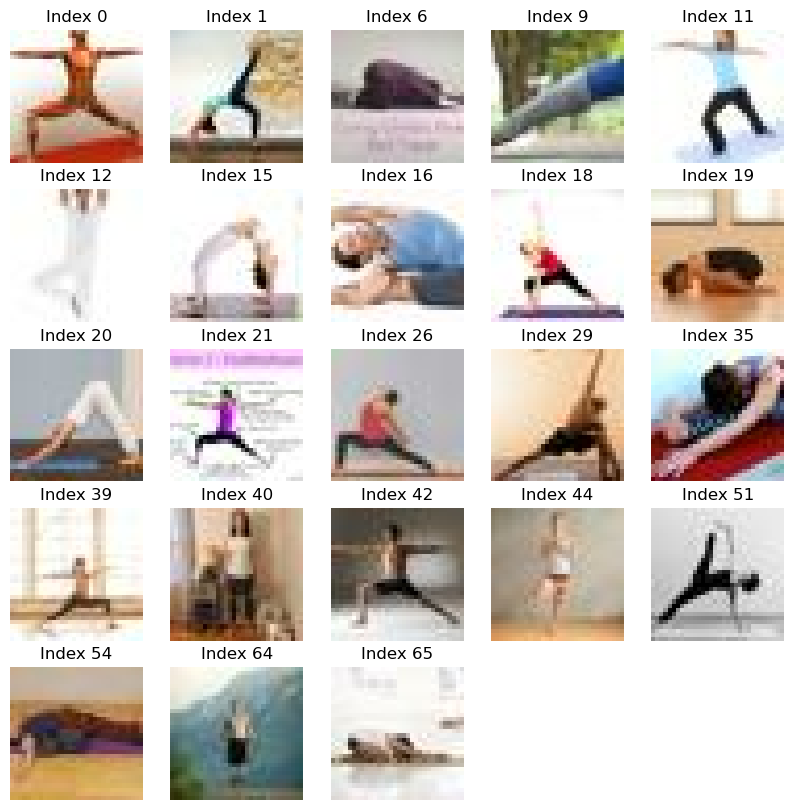

In [41]:
# show the images of the misclassified images above
fig, ax = plt.subplots(nrows = 5, ncols = 5, figsize = (10,10))

for i in range(len(incorrect_indexes)):
    row = i//5
    col = i%5
    
    ax[row, col].imshow(x_test[incorrect_indexes[i]].numpy().astype('uint8'))
    ax[row, col].set_title("Index " + str(incorrect_indexes[i]))
    ax[row, col].axis("off")
    
ax[4, 3].axis("off")
ax[4, 4].axis("off")

### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [151]:
# taking th flatten layer from our final CNN model
layer_name = 'flatten_2'
flatten_layer_model = Model(inputs = cnn.input, outputs = cnn.get_layer(layer_name).output)

In [277]:
def euclidean(x, y):
    dist = 0
    
    for i in range(len(x)):
        dist += pow((x[i] - y[i]), 2)
        
    return (sqrt(dist))

In [313]:
def sort_key(neighbour):
    return neighbour[1]

def k_nearest_neighbours(x_train_data, x_test_map, k):
    dist = []
    
    for i in range(len(x_train_data)):
        x_train_map = x_train_data[i].numpy()
        # reshaping our x to 
        x_train_map = np.expand_dims(x_train_map, axis = 0)
        # obtain the feature map of the current x instance
        x_train_map = flatten_layer_model.predict(x_train_map, verbose = 0)[0]
        
        dist.append((x_train_data[i], euclidean(x_train_map, x_test_map), class_names[y_train[i]]))
    
    dist.sort(key = sort_key)
    knn = dist[0:k]
    
    return knn

In [357]:
# randomly select 10 test images to put through the KNN algorithm
random_indexes = random.sample(range(len(x_test)), 10)
random_indexes

[56, 11, 40, 53, 66, 25, 5, 8, 55, 31]

1/1 [==============================] - 0s 11ms/step


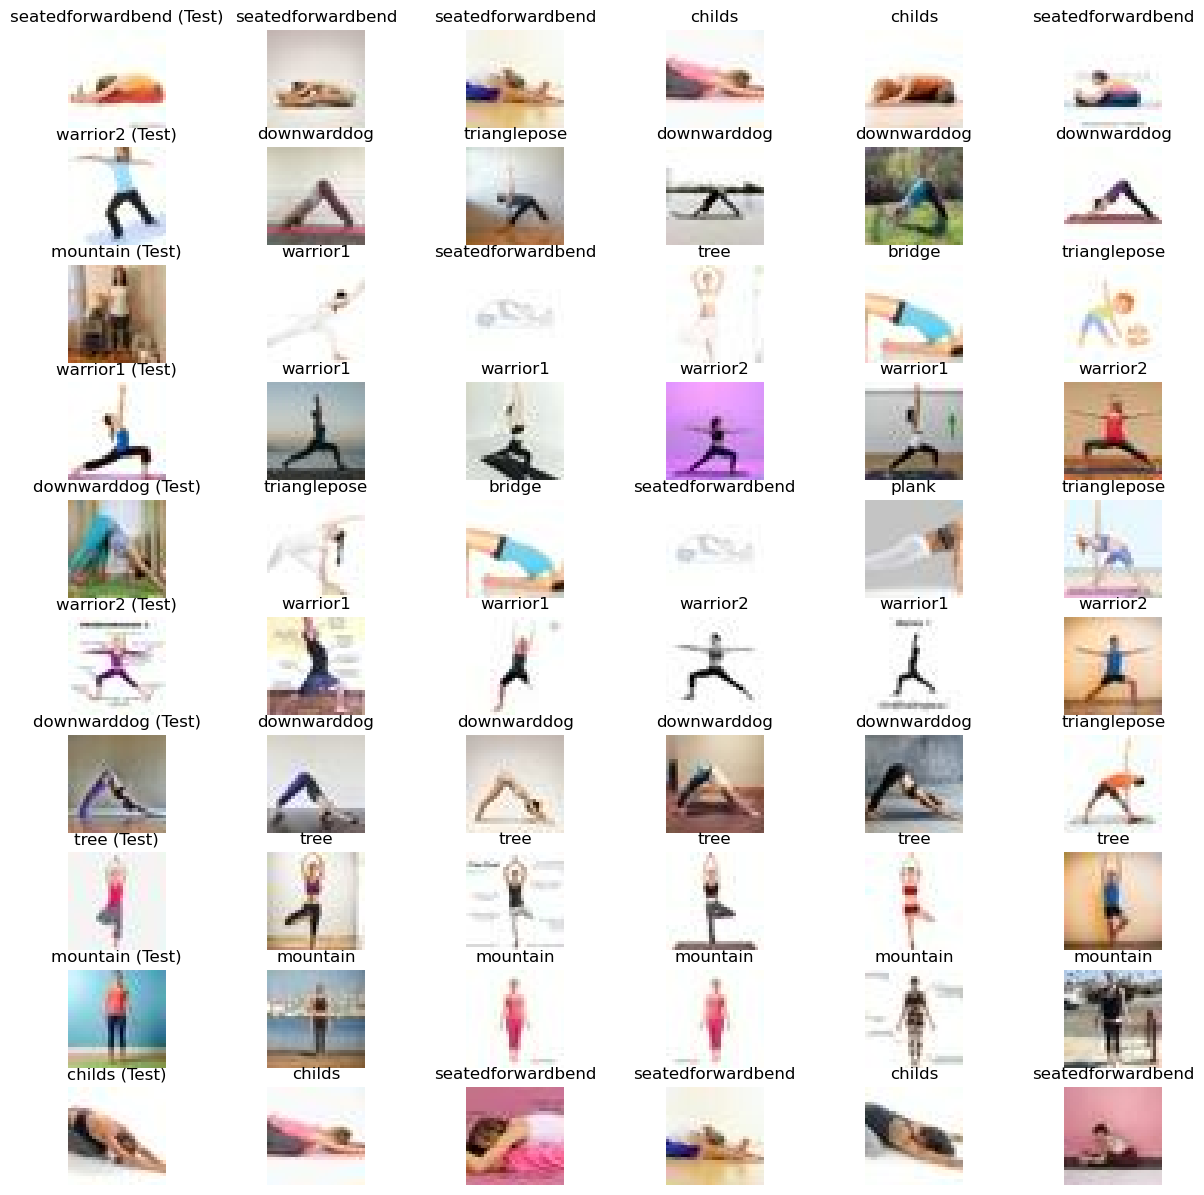

In [358]:
# plotting the random test images specified above with their nearest 5 neighbours based off of Euclidean distance in the 
# plot below in each row the first image on the left is the test image while the other five are its nearest neighbours
fig, ax = plt.subplots(nrows = 10, ncols = 6, figsize = (15,15))

# used to obtain the feature map of y instance specified below
for i in range(len(random_indexes)):
    test_index = random_indexes[i]
    test_img = (x_test[test_index].numpy())
    test_img = np.expand_dims(test_img, axis = 0)
    test_feature_maps = flatten_layer_model.predict(test_img)[0]
    # conduct the KNN algorithm with k = 5 using y instance {test_index}
    test_img_knn = k_nearest_neighbours(x_train, test_feature_maps, 5)

    ax[i, 0].imshow(x_test[test_index].numpy().astype('uint8'))
    ax[i, 0].set_title(class_names[y_test[test_index]] + " (Test)")
    ax[i, 0].axis('off')

    for j in range(len(test_img_knn)):
        ax[i, j + 1].imshow(test_img_knn[j][0].numpy().astype('uint8'))
        ax[i, j + 1].set_title(test_img_knn[j][2])
        ax[i, j + 1].axis('off')